# Name of the Project : Prediction using Decision Tree Algorithm


### Task : 2
### Level : INTERMEDIATE LEVEL
### Position : letsgrowmoreintern
### Auther : Kasetty Purushotham


##### Problem Statement -

Create the Decision Tree classifier and visualize it graphically. 
The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly. 

In [1]:
# importing libries

import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:

dataset = pd.read_csv("IRIS_flower.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
dataset.shape

(150, 6)

In [11]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [13]:
le = LabelEncoder()

In [15]:
dataset.iloc[:,-1] = le.fit_transform(dataset.iloc[:,-1])

In [16]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [17]:
x = dataset.iloc[:,:-1]
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [19]:
y = dataset.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [21]:
# Splitting the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [22]:
x_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
125,126,7.2,3.2,6.0,1.8
98,99,5.1,2.5,3.0,1.1
73,74,6.1,2.8,4.7,1.2
144,145,6.7,3.3,5.7,2.5
21,22,5.1,3.7,1.5,0.4


In [24]:
x_train.count()

Id               120
SepalLengthCm    120
SepalWidthCm     120
PetalLengthCm    120
PetalWidthCm     120
dtype: int64

In [25]:
x_test.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
88,89,5.6,3.0,4.1,1.3
72,73,6.3,2.5,4.9,1.5
20,21,5.4,3.4,1.7,0.2
16,17,5.4,3.9,1.3,0.4
147,148,6.5,3.0,5.2,2.0


In [26]:
x_test.count()

Id               30
SepalLengthCm    30
SepalWidthCm     30
PetalLengthCm    30
PetalWidthCm     30
dtype: int64

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 5)
(120,)
(30, 5)
(30,)


In [28]:
# Model Building
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()


In [29]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
y_pred = dt.predict(x_test)

In [31]:
y_pred

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [33]:
y_test = np.array(y_test)

In [34]:
y_test

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [36]:
# Accuracy

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix



In [37]:
acc = accuracy_score(y_test,y_pred)

In [38]:
acc

0.9666666666666667

In [39]:
cls_rep = classification_report(y_test,y_pred)

In [41]:
print(cls_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      1.00      0.96        12
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [42]:
con_mat = confusion_matrix(y_test,y_pred)

In [43]:
con_mat

array([[ 9,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  8]], dtype=int64)

<AxesSubplot:>

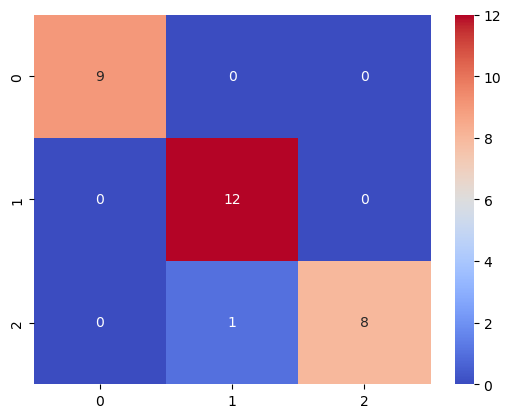

In [49]:
import seaborn as sns

sns.heatmap(con_mat,annot=True,cmap='coolwarm')

In [50]:
# Displaying the tree

from sklearn import tree


[Text(0.4, 0.8333333333333334, 'X[4] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [41, 38, 41]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.6, 0.5, 'X[0] <= 101.0\ngini = 0.499\nsamples = 79\nvalue = [0, 38, 41]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 41\nvalue = [0, 0, 41]')]

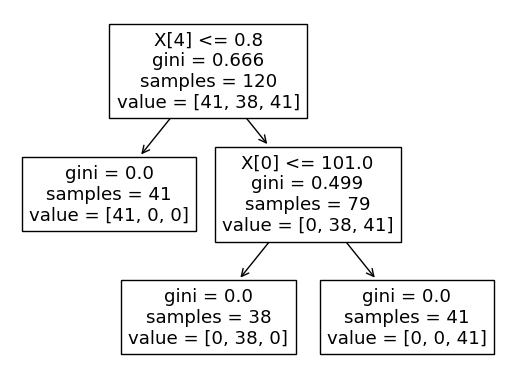

In [51]:
tree.plot_tree(dt)

[Text(0.4, 0.8333333333333334, 'X[4] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [41, 38, 41]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.6, 0.5, 'X[0] <= 101.0\ngini = 0.499\nsamples = 79\nvalue = [0, 38, 41]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 41\nvalue = [0, 0, 41]')]

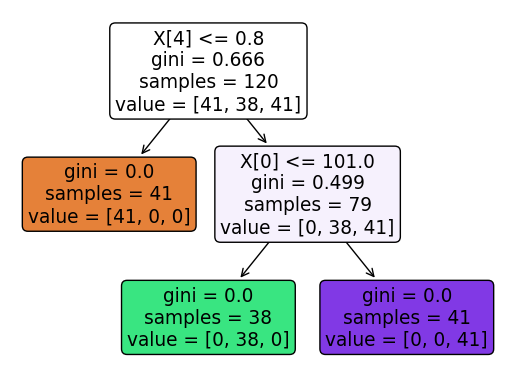

In [55]:
tree.plot_tree(dt,filled=True,rounded=True)

[Text(0.4, 0.8333333333333334, 'PetalWidthCm <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [41, 38, 41]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.6, 0.5, 'Id <= 101.0\ngini = 0.499\nsamples = 79\nvalue = [0, 38, 41]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 41\nvalue = [0, 0, 41]')]

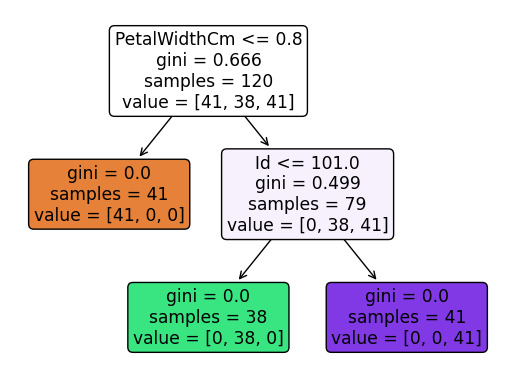

In [58]:
tree.plot_tree(dt,filled=True,rounded=True,feature_names=x.columns)

[Text(0.4, 0.8333333333333334, 'PetalWidthCm <= 0.8\nsamples = 120\nvalue = [41, 38, 41]'),
 Text(0.2, 0.5, 'samples = 41\nvalue = [41, 0, 0]'),
 Text(0.6, 0.5, 'Id <= 101.0\nsamples = 79\nvalue = [0, 38, 41]'),
 Text(0.4, 0.16666666666666666, 'samples = 38\nvalue = [0, 38, 0]'),
 Text(0.8, 0.16666666666666666, 'samples = 41\nvalue = [0, 0, 41]')]

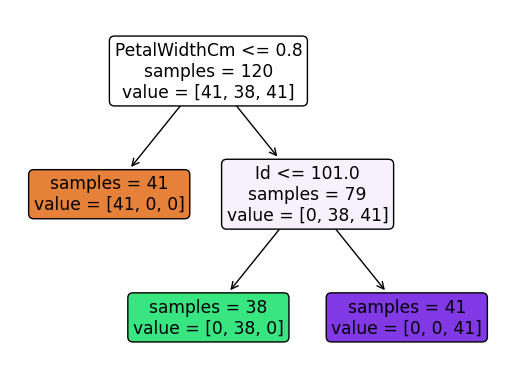

In [59]:
tree.plot_tree(dt,filled=True,rounded=True,feature_names=x.columns,impurity=False)

[Text(0.4, 0.8333333333333334, 'PetalWidthCm <= 0.8\nsamples = 100.0%\nvalue = [0.342, 0.317, 0.342]'),
 Text(0.2, 0.5, 'samples = 34.2%\nvalue = [1.0, 0.0, 0.0]'),
 Text(0.6, 0.5, 'Id <= 101.0\nsamples = 65.8%\nvalue = [0.0, 0.481, 0.519]'),
 Text(0.4, 0.16666666666666666, 'samples = 31.7%\nvalue = [0.0, 1.0, 0.0]'),
 Text(0.8, 0.16666666666666666, 'samples = 34.2%\nvalue = [0.0, 0.0, 1.0]')]

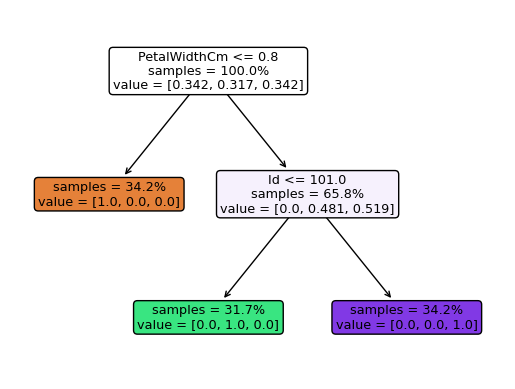

In [60]:
tree.plot_tree(dt,filled=True,rounded=True,feature_names=x.columns,impurity=False,proportion=True)

## THANK YOU 🙏🙏